# Régression logistique

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pd.set_option("display.max_rows", None, "display.max_columns", None) # displaying all rows and columns of a dataframe
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [193]:
df = pd.read_csv("data/data_preprocessed.csv")
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_
df_noncor = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)
df_labels = pd.read_csv('data/data_preprocessed.csv')
df_.isnull().all()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability_det     False
dtype: bool

In [195]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability_det   2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


# Visualisation avec ACP en utilisant Potability_det

In [196]:
# Sélectionner les variables d'origine
X = df_[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_['Potability_det']  # Utiliser la variable cible originale

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 16)
X_test

# feature scaling of the features in Training and Test Set
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)






In [197]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

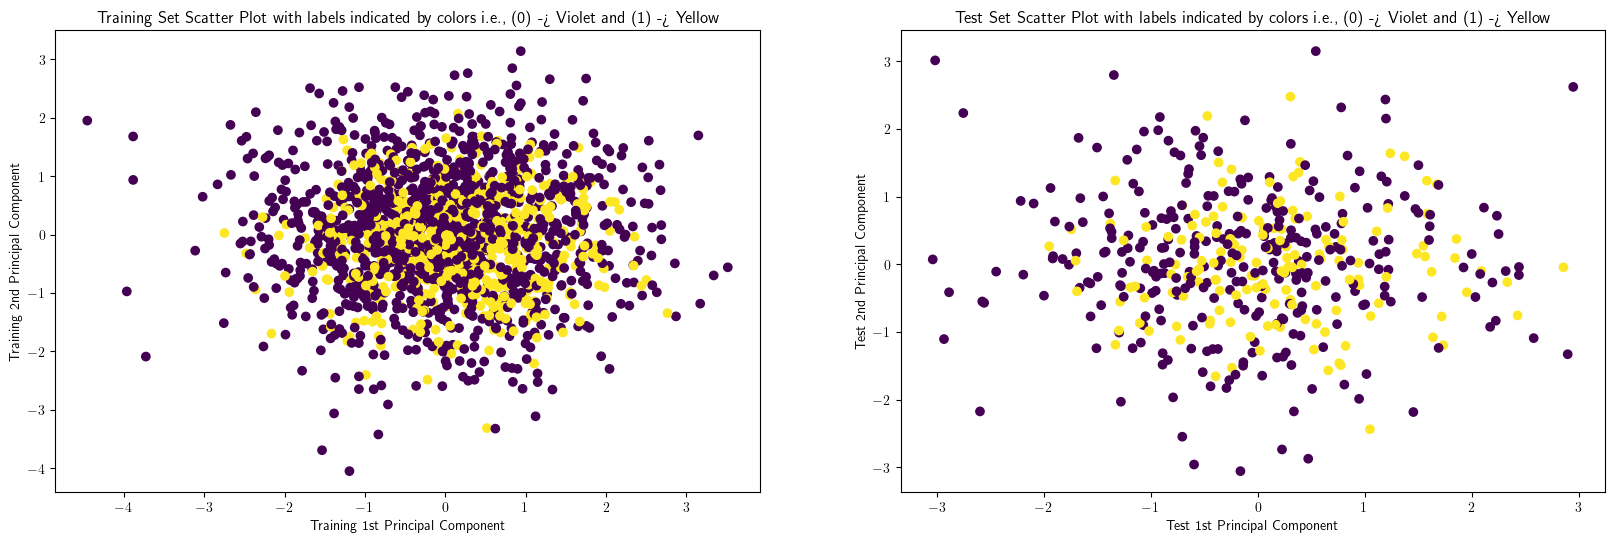

In [198]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [199]:
# 5-Fold Grid-Search Cross Validation on Logistic Regression Classifier for tuning the hyper-parameter, C with Accuracy scoring
params = {'C':[0.01, 0.1, 1, 10, 100,1000]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.01;, score=(train=0.658, test=0.657) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.660, test=0.661) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.650, test=0.649) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.661, test=0.659) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.660, test=0.661) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=0.651, test=0.646) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=0.659,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [200]:
# getting the best hyper-parameter
print(model_cv.best_params_)

{'C': 0.01}


In [201]:
# re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10
model = LogisticRegression(C = 0.01).fit(X_train_pca, y_train)

In [202]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

In [203]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.6603053435114504
Test Accuracy of the Model:  0.673202614379085

Training Precision of the Model:  0.0
Test Precision of the Model:  0.0

Training Recall of the Model:  0.0
Test Recall of the Model:  0.0

Training F1-Score of the Model:  0.0
Test F1-Score of the Model:  0.0



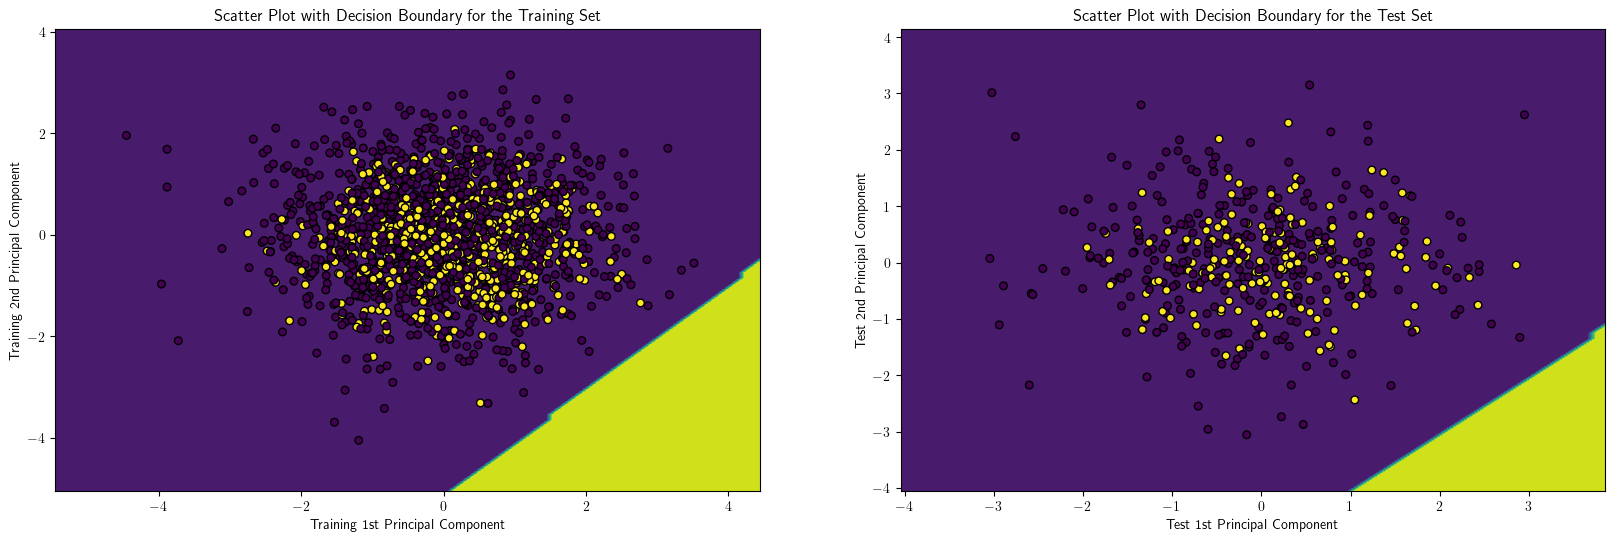

In [204]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# Visualisation avec ACP en utilisant Potability

In [205]:
y_noncor = df_noncor['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y_noncor, test_size=0.2, random_state = 16)
X_test

# feature scaling of the features in Training and Test Set
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)



In [206]:
# Incremental Principal Component Analysis to select 2 features such that they explain as much variance as possible
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) # displaying all rows and columns of a dataframe
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

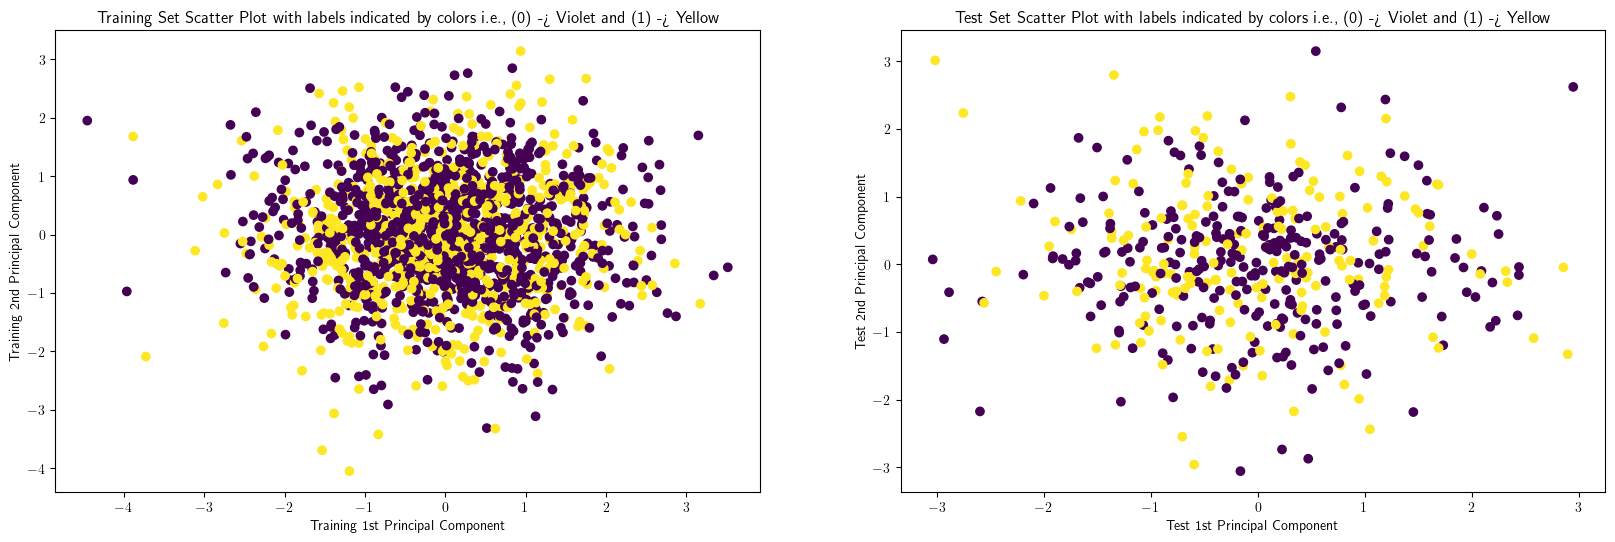

In [207]:
# Scatter Plot of Training and Test Set with labels indicated by colors
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

In [208]:
# 5-Fold Grid-Search Cross Validation on Logistic Regression Classifier for tuning the hyper-parameter, C with Accuracy scoring
params = {'C':[0.01, 0.1, 1, 10, 100,1000]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........C=0.01;, score=(train=0.608, test=0.610) total time=   0.0s
[CV 2/5] END ........C=0.01;, score=(train=0.609, test=0.608) total time=   0.0s
[CV 3/5] END ........C=0.01;, score=(train=0.609, test=0.608) total time=   0.0s
[CV 4/5] END ........C=0.01;, score=(train=0.609, test=0.608) total time=   0.0s
[CV 5/5] END ........C=0.01;, score=(train=0.609, test=0.609) total time=   0.0s
[CV 1/5] END .........C=0.1;, score=(train=0.608, test=0.610) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.609, test=0.608) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.609, test=0.610) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.609, test=0.608) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.610, test=0.609) total time=   0.0s
[CV 1/5] END ...........C=1;, score=(train=0.608, test=0.610) total time=   0.0s
[CV 2/5] END ...........C=1;, score=(train=0.609,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [209]:
# getting the best hyper-parameter
print(model_cv.best_params_)

{'C': 0.1}


In [210]:
# re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10
model = LogisticRegression(C = 0.1).fit(X_train_pca, y_train)

In [211]:
# getting the Training Set Predictions
y_train_pred = model.predict(X_train_pca)

# getting the Test Set Predictions
y_test_pred = model.predict(X_test_pca)

In [212]:
# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.6090512540894221
Test Accuracy of the Model:  0.6143790849673203

Training Precision of the Model:  1.0
Test Precision of the Model:  0.0

Training Recall of the Model:  0.001392757660167131
Test Recall of the Model:  0.0

Training F1-Score of the Model:  0.0027816411682892906
Test F1-Score of the Model:  0.0



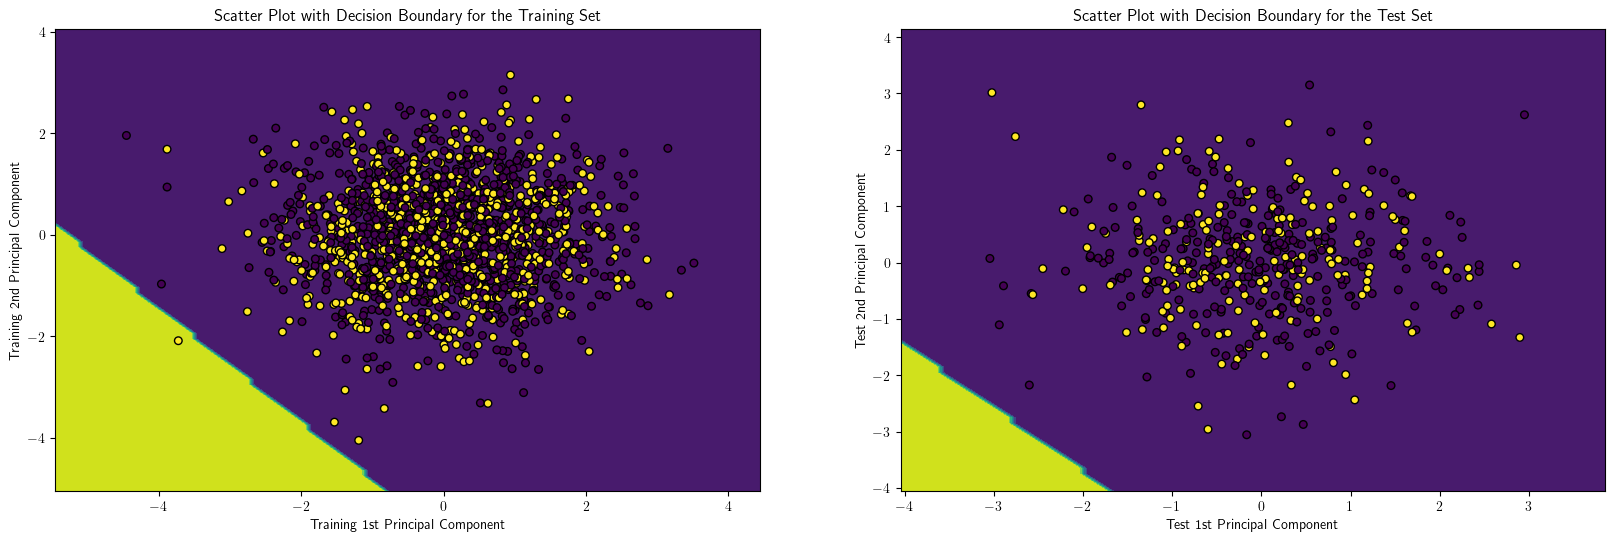

In [213]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

# Test accuracy le modèle avec le données réeel en utilisant Potability_det

In [215]:
# Sélectionner les variables d'origine
X = df_[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df_['Potability_det']  # Utiliser la variable cible originale

# Diviser les données en ensembles d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 16)
X_test

cls = LogisticRegression()
cls.fit(X, y)
cls.predict(X_test)
cls.score(X_test,y_test)


0.7603485838779956

# Test accuracy le modèle avec le données réeel en utilisant Potability

In [216]:
y_noncor = df_noncor['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y_noncor, test_size=0.2, random_state = 16)
X_test

cls = LogisticRegression()
cls.fit(X, y_noncor)
cls.predict(X_test)
cls.score(X_test,y_test)

0.6143790849673203